# Homework 04 - Exploratory data analysis

_Goal_ :

**We want to explore the player-referee dyads dataset before diving into proper machine learning.**

_Tools_ :

**The tools used are :**
* Pandas
* Seaborn

---

In [2]:
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime # needed for df.birthday 

import seaborn as sns
sns.set_context('notebook')

## Overview of dataset

In [3]:
df = pd.read_csv('./CrowdstormingDataJuly1st.csv')

print('size of df (MB):',sys.getsizeof(df)/1000000)
print(df.shape)
df.head()

size of df (MB): 101.953989
(146028, 28)


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


## Remove redondant/useless  features

In [4]:
df.drop('player',1,inplace=True) # the long name of the player is redondant with the short one
df.drop('photoID',axis=1,inplace=True) # we don't need the player's photo ID 

### Check redundancy of df.Alpha_3 

In [5]:
# check that df.Alpha_3 is equivalent to df.refCountry ! 
len(df.Alpha_3.unique())==len(df.refCountry.unique())

for a in df.Alpha_3.unique():
    
    if len(df.refCountry[df.Alpha_3==a].unique()) != 1:
        
        print(a)
        
# the only value that does not correspond is NaN! ==> we remove df.Alpha_3 !
df.drop('Alpha_3',1,inplace=True)

nan


In [6]:
# Check the effect : we can save memory !
print(df.shape)
print('size of df (MB):',sys.getsizeof(df)/1000000)

(146028, 25)
size of df (MB): 73.08242


Counting null values:

In [7]:
df.isnull().sum()

playerShort          0
club                 0
leagueCountry        0
birthday             0
height             263
weight            2243
position         17726
games                0
victories            0
ties                 0
defeats              0
goals                0
yellowCards          0
yellowReds           0
redCards             0
rater1           21407
rater2           21407
refNum               0
refCountry           0
meanIAT            163
nIAT               163
seIAT              163
meanExp            163
nExp               163
seExp              163
dtype: int64

## Distribution of rows ~ 'summarised' dyads
(each row represents [\`the number of red cards given to a player by a particular referee throughout all matches the two encountered each other'](https://github.com/ADAEPFL/Homework/blob/master/04%20-%20Applied%20ML/DATA.md) )

First, check that some 'basic' numbers coincide with the ones provided in
https://github.com/ADAEPFL/Homework/blob/master/04%20-%20Applied%20ML/DATA.md

In [8]:
print('number of unique players:',len(df.playerShort.unique()))
print('number of unique referees:',len(df.refNum.unique()))

number of unique players: 2053
number of unique referees: 3147


Plotting the distribution of dyads, per player:

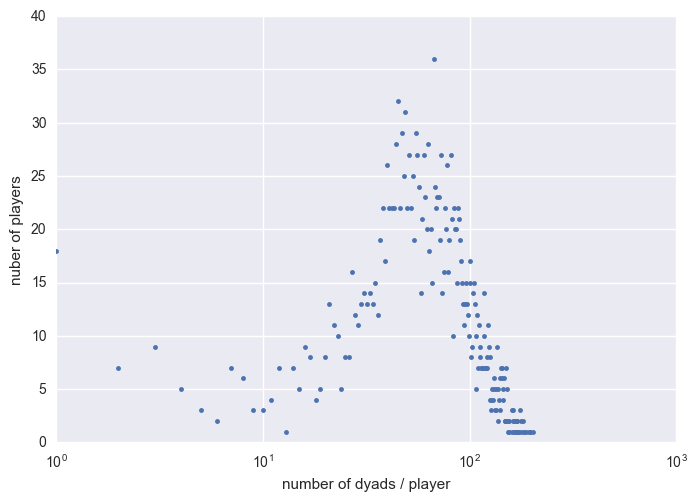

In [9]:
dyads_per_player = df.playerShort.value_counts().value_counts()

plt.plot(dyads_per_player,marker='.',linestyle='')
plt.xlabel('number of dyads / player')
plt.ylabel('nuber of players')
plt.xscale('log')

## Quick overview of correlations and distributions of numerical features in the dataset 

### Cards VS body features

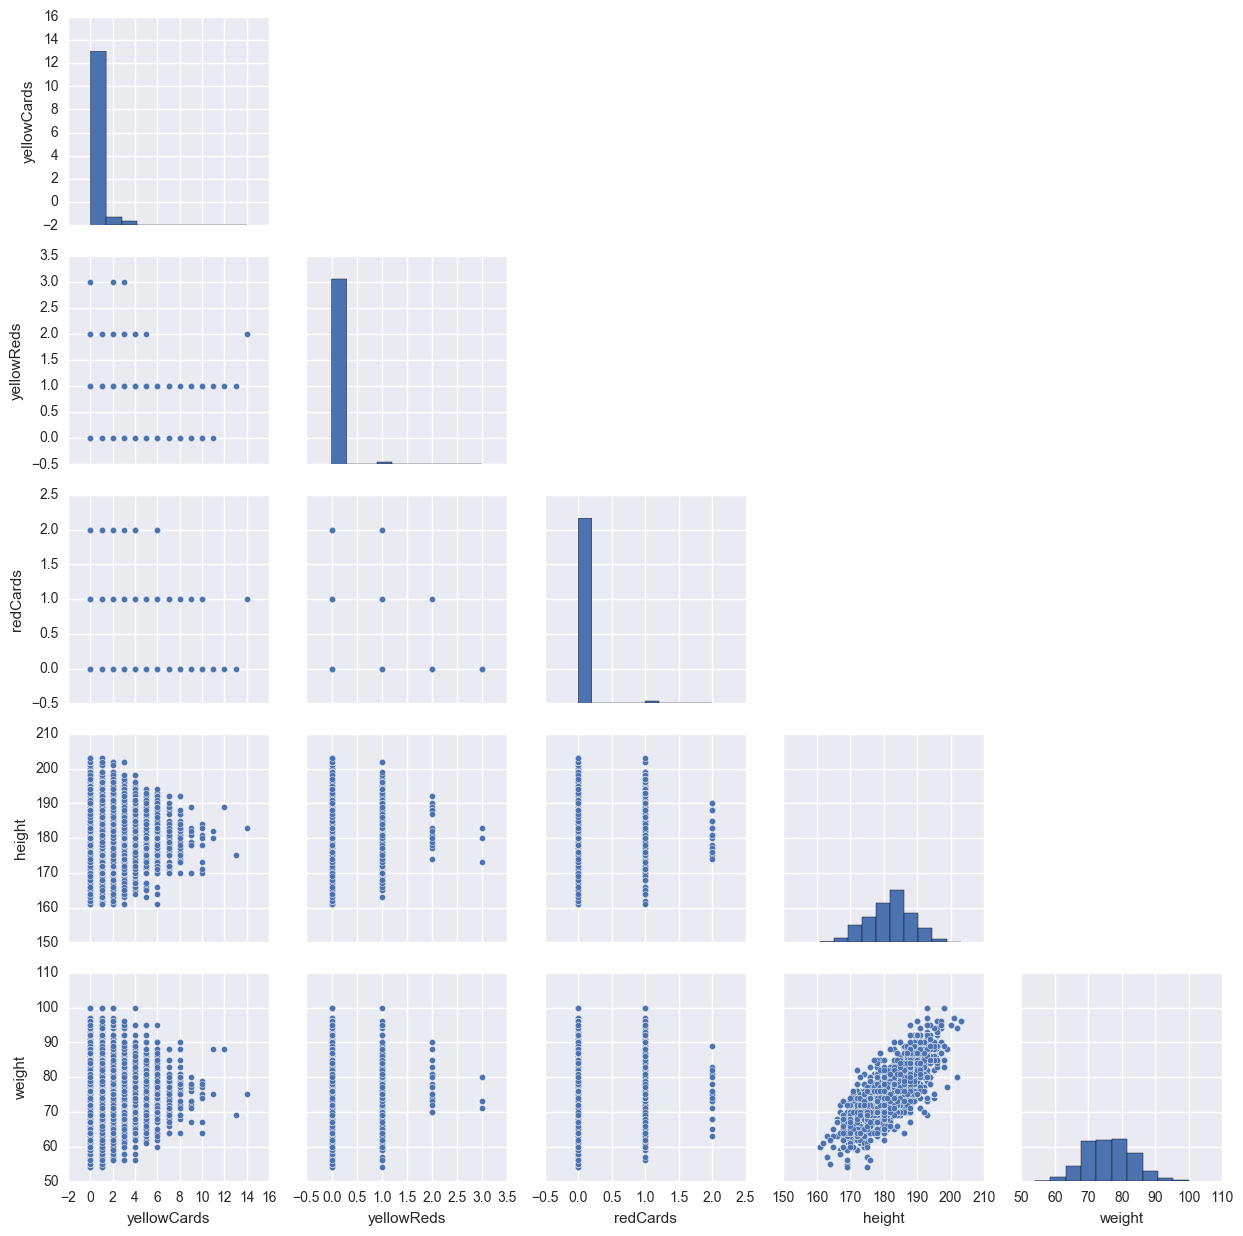

In [10]:
g = sns.pairplot(df[['yellowCards','yellowReds', 'redCards','height','weight']].dropna())

# save space, by plottng only lower triangle! ;)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

### Cards VS skin color

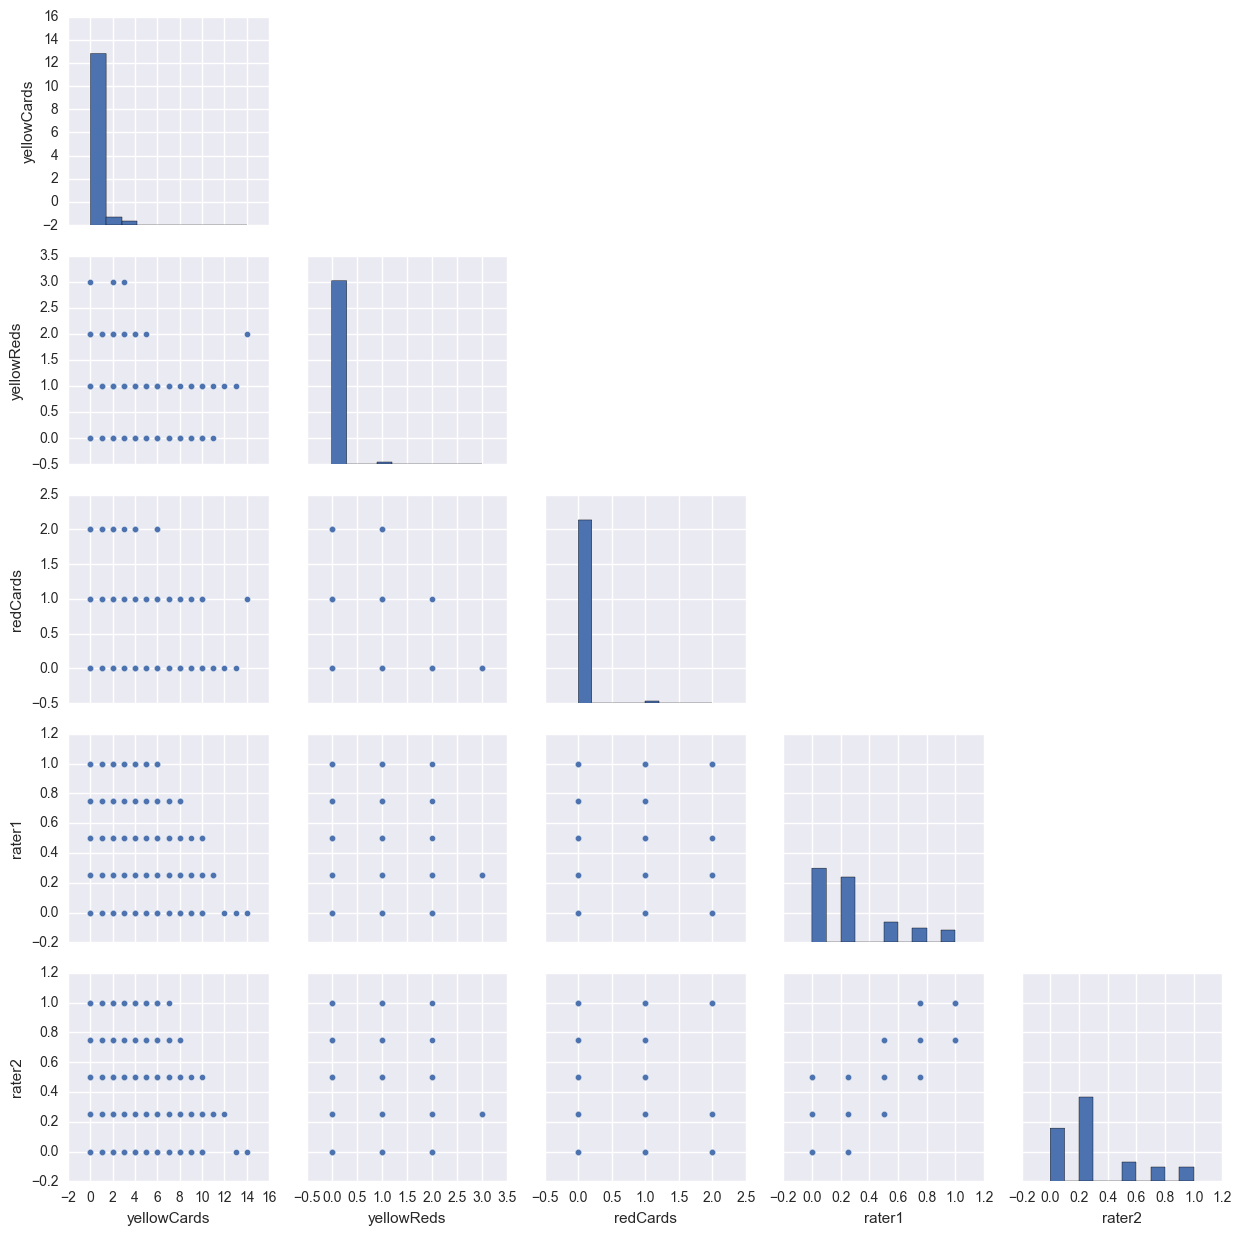

In [11]:
g = sns.pairplot(df[['yellowCards','yellowReds', 'redCards','rater1', 'rater2']].dropna())

# save space, by plotting only lower triangle! ;)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

### Cards VS performance

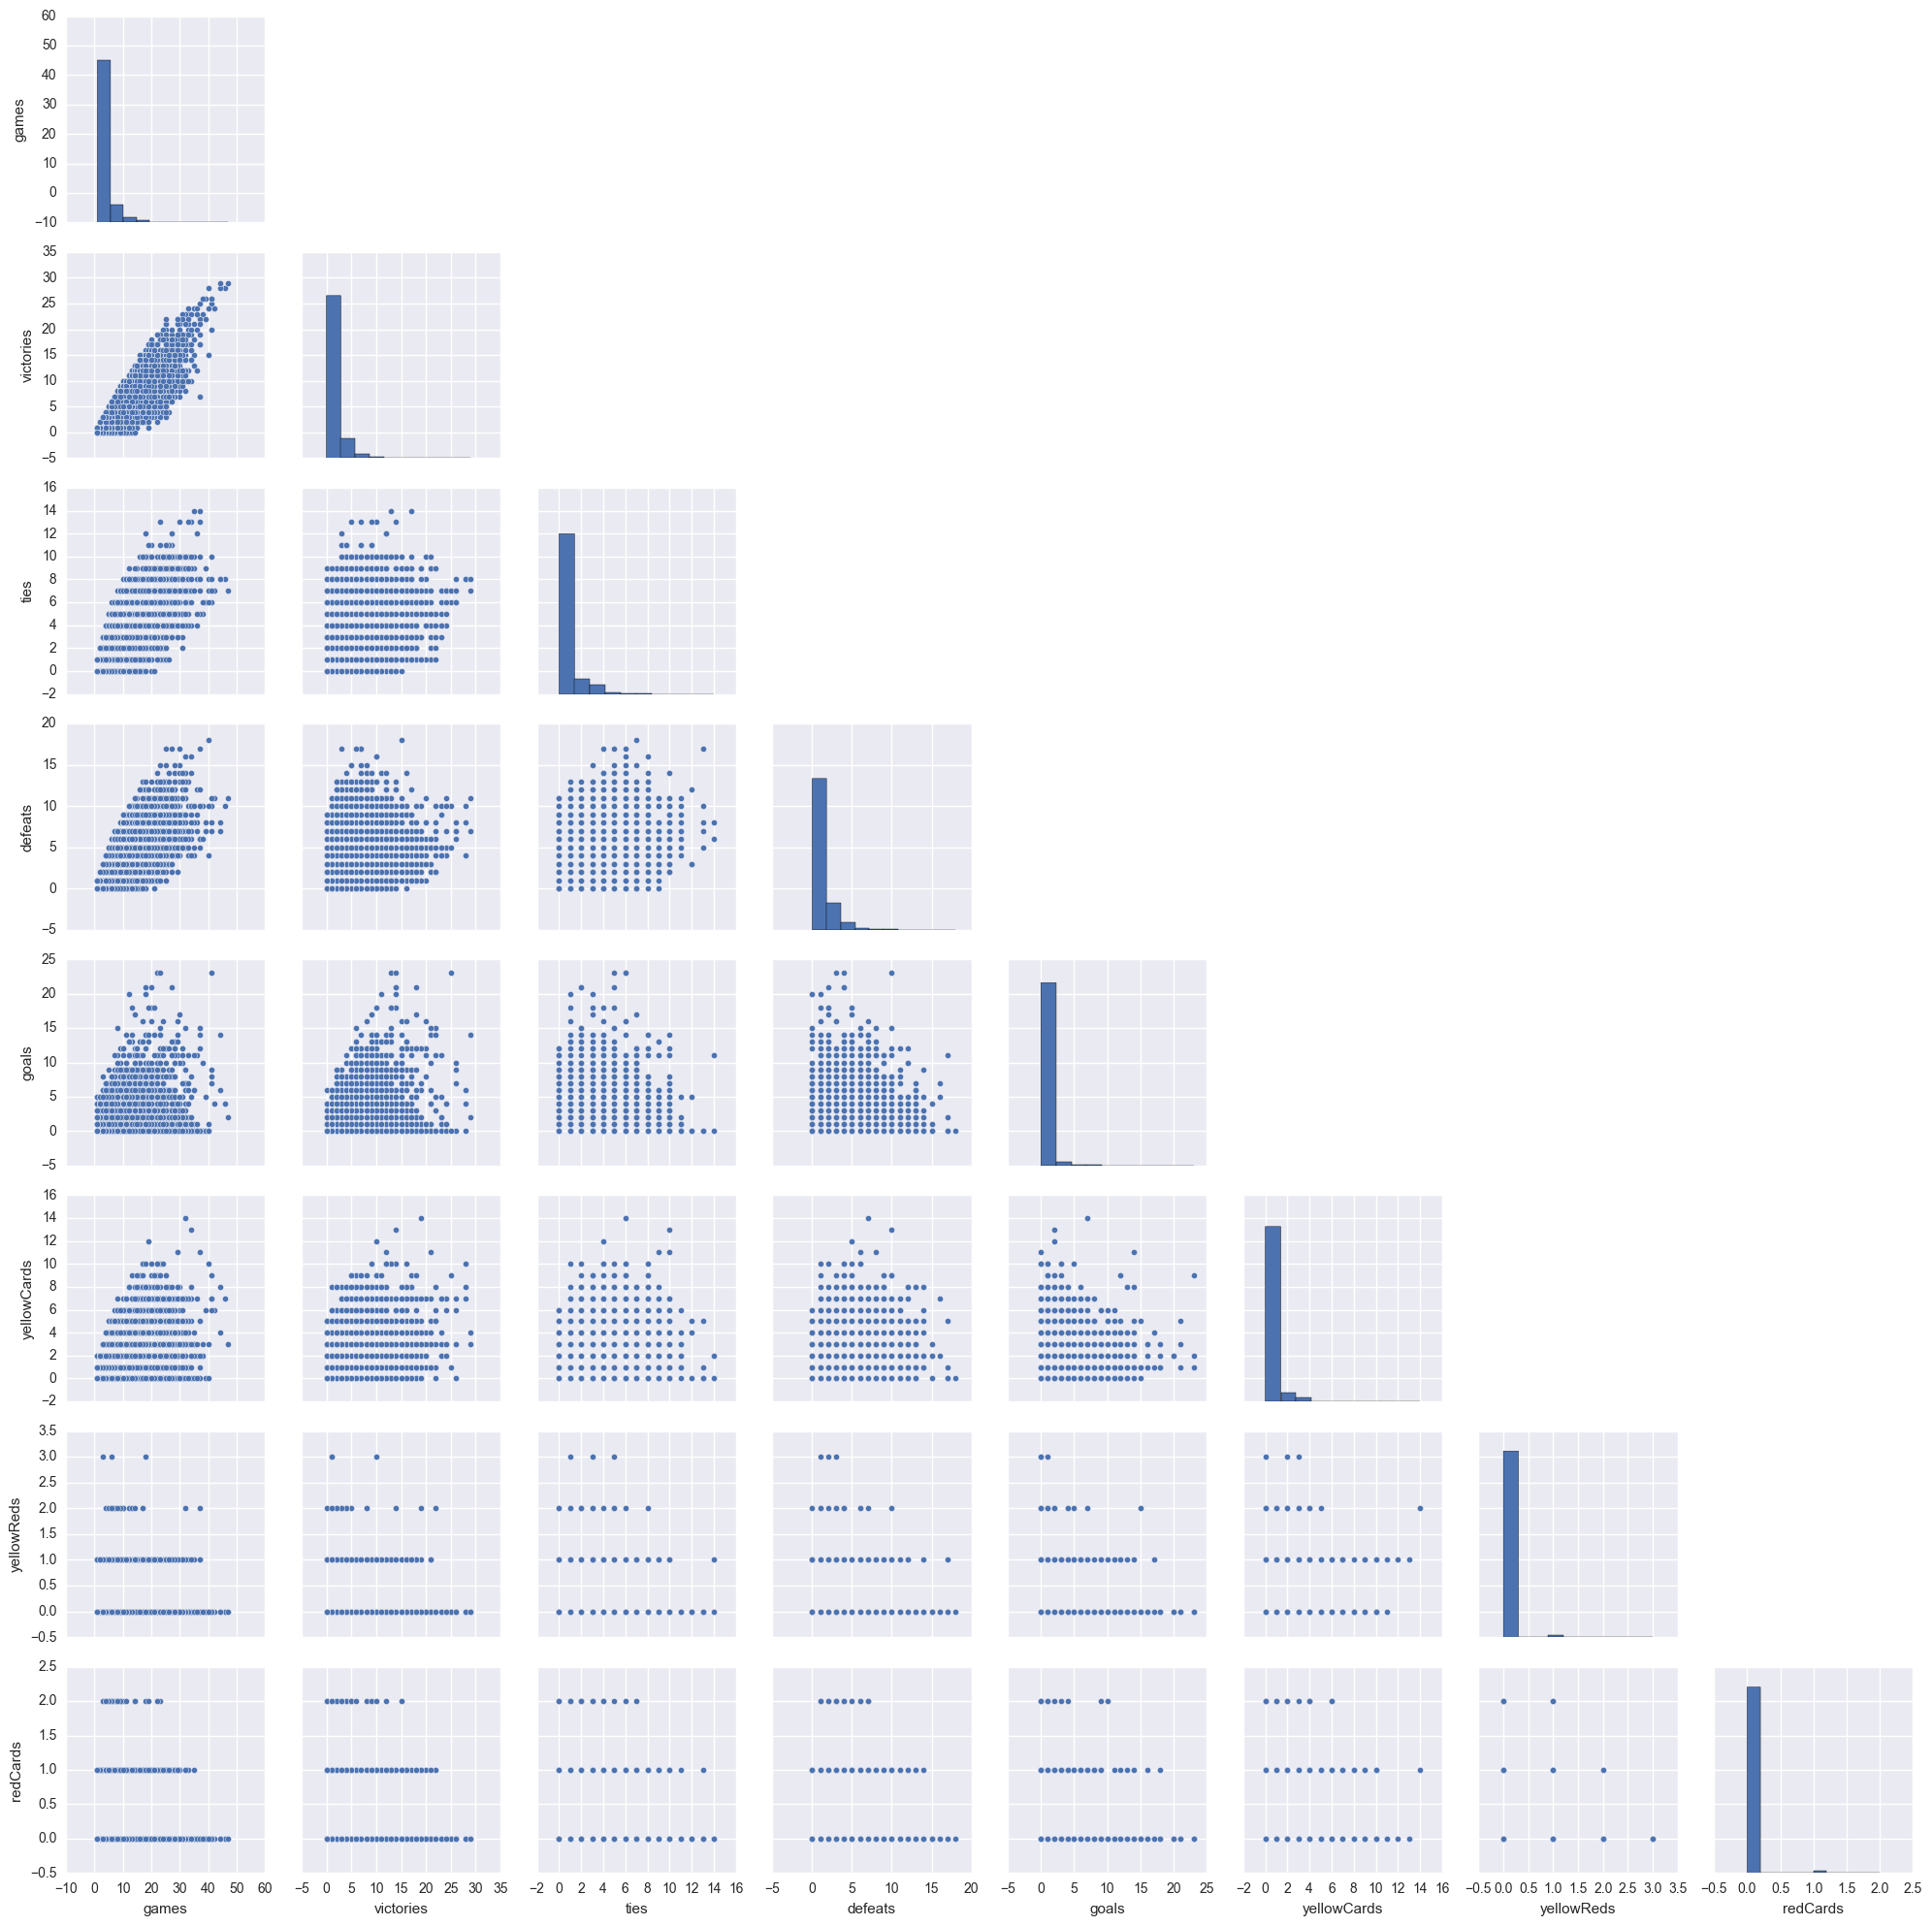

In [12]:
g = sns.pairplot(df[['games', 'victories','ties', 'defeats','goals',
                    'yellowCards','yellowReds', 'redCards']])

# save space, by plottng only lower triangle! ;)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

### Cards VS bias score

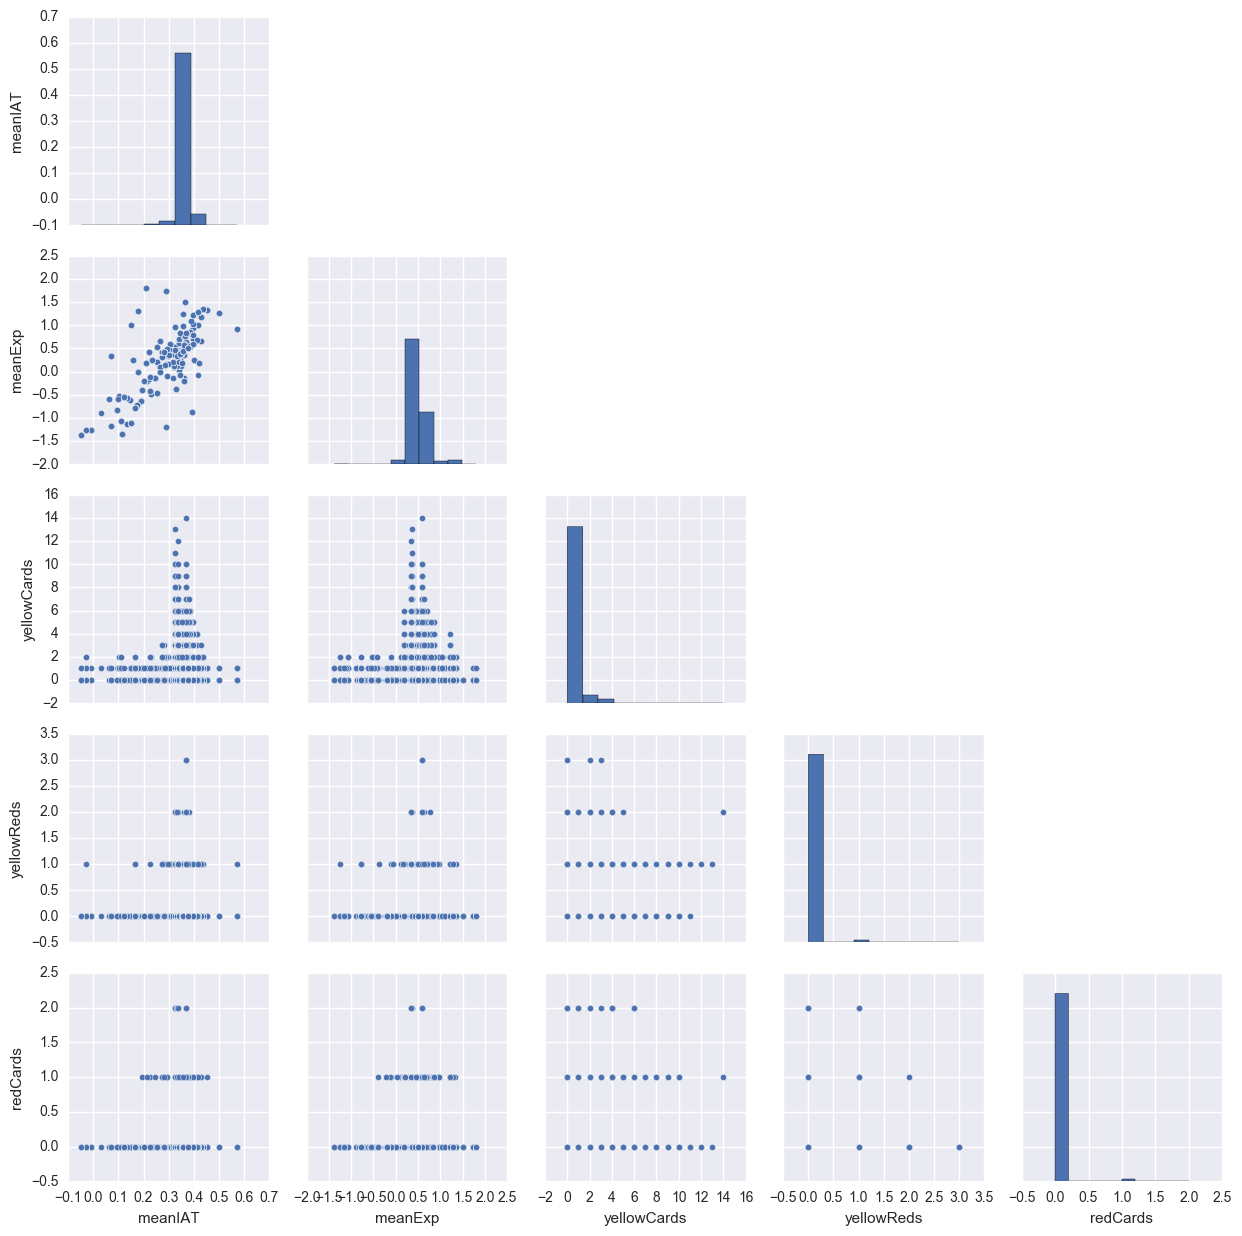

In [13]:
g = sns.pairplot(df[['meanIAT','meanExp',
                     'yellowCards','yellowReds', 'redCards']].dropna())

# save space, by plottng only lower triangle! ;)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

## Skin color VS bias score 

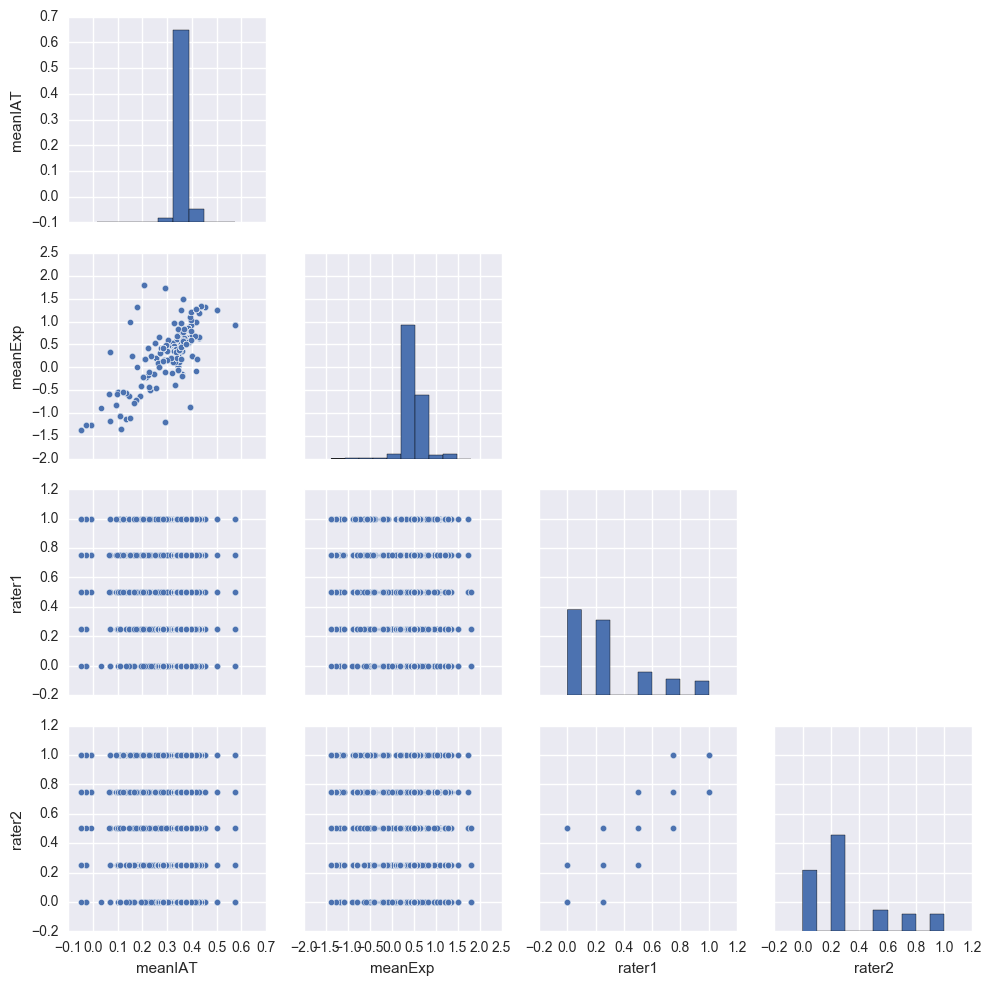

In [34]:
g = sns.pairplot(df[['meanIAT','meanExp',
                     'rater1','rater2']].dropna())

# save space, by plottng only lower triangle! ;)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

### Cards VS position

Check that all players have only one position:

In [15]:
for p in df.playerShort.unique():
    
    if len(df[df.playerShort==p].position.unique())!=1:
        
        print(p)

Grouping dataset by player:

In [16]:
player_group = df.groupby(df.playerShort).agg({'position': lambda x: x.unique()[0],
                                             'yellowCards': np.sum,
                                             'yellowReds': np.sum,
                                             'redCards': np.sum})
player_group.head()

,yellowCards,yellowReds,position,redCards
playerShort,,,,
aaron-hughes,19,0,Center Back,0
aaron-hunt,42,0,Attacking Midfielder,1
aaron-lennon,11,0,Right Midfielder,0
aaron-ramsey,31,0,Center Midfielder,1
abdelhamid-el-kaoutari,8,4,Center Back,2


Grouping againg, _by position_:

In [17]:
pos_group = player_group.groupby(player_group.position,as_index=False).sum()

# checking that we are grouping in the right way:
pos_group.yellowCards.sum()==df[df.position.notnull()].yellowCards.sum()

True

Plotting _cards_ distribution, _by position_:

In [18]:
pos_group.head()

,position,yellowCards,yellowReds,redCards
0,Attacking Midfielder,4174,89,93
1,Center Back,10663,396,445
2,Center Forward,5550,144,196
3,Center Midfielder,2778,79,76
4,Defensive Midfielder,8991,291,200


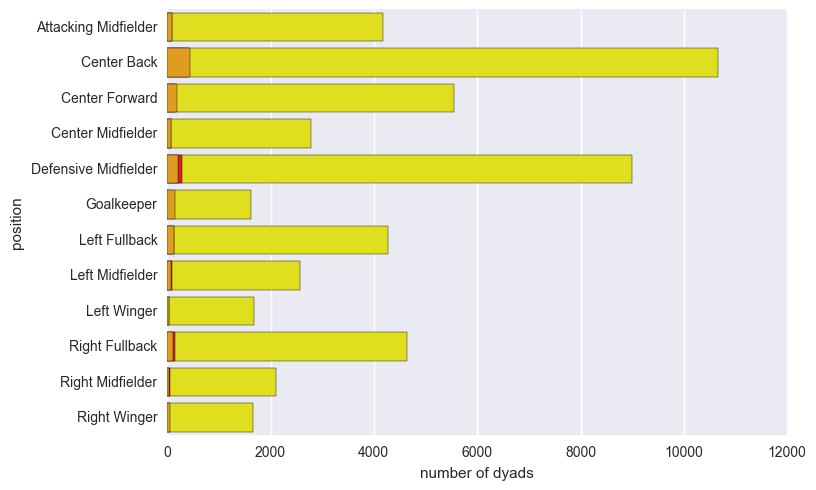

In [19]:
sns.barplot(x=pos_group.yellowCards,y=pos_group.position,color='yellow')
sns.barplot(x=pos_group.yellowReds,y=pos_group.position,color='red')
sns.barplot(x=pos_group.redCards,y=pos_group.position,color='orange')
plt.xlabel('number of dyads')

## Stats on clubs

In [20]:
print('number of unique clubs:',len(df.club.unique()))

players_in_c = []

# player_per_club =
for c in df.club.unique():
    
    players_in_c.append(len(df.loc[df.club==c,'playerShort'].unique()))
    
# sum(players_in_c) # check that this adds up to the number of players 

number of unique clubs: 118


### Distribution of # players / club:

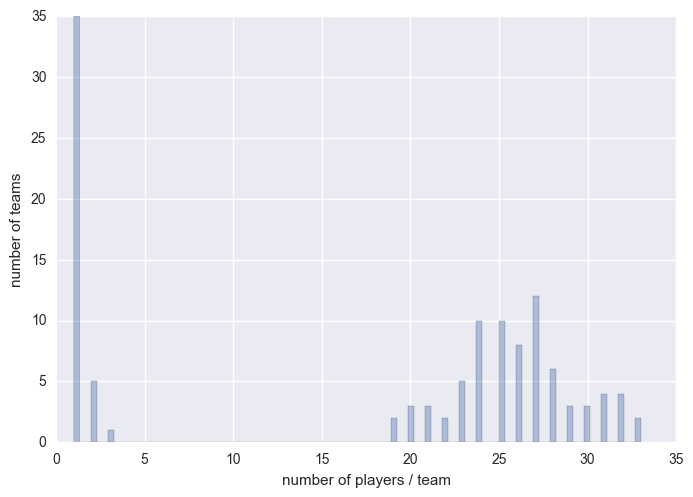

In [21]:
sns.distplot(players_in_c,kde=False,bins=100)
# plt.hist(players_in_c)
plt.xlabel('number of players / team')
plt.ylabel('number of teams')

## Stats on skin color

The ratings are in a _discrete_ scale:

In [22]:
print(df.rater1.unique())
print(df.rater2.unique())

[ 0.25  0.75   nan  0.    1.    0.5 ]
[ 0.5   0.75   nan  0.    0.25  1.  ]


...and they seem to be well correlated:

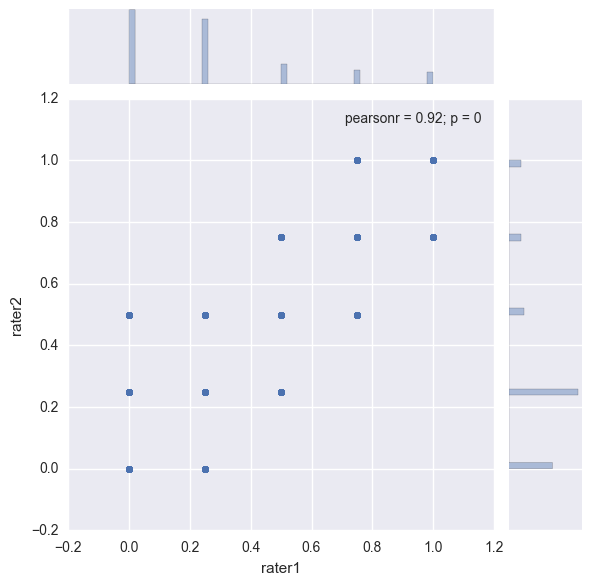

In [23]:
sns.jointplot(df.rater1,df.rater2)

## Stats on referees

In [24]:
print('number of unique referees:',len(df.refNum.unique()))
print('number of unique referees\' coutries:',len(df.refCountry.unique()))

number of unique referees: 3147
number of unique referees' coutries: 161


Getting the counts of # referees/coutry:

In [25]:
ref_df = []

for c in df.refCountry.unique():
    
    ref_df.append(len(df.refNum[df.refCountry==c].unique()))
    
# this is just a check:
print(len(ref_df)==len(df.refCountry.unique()))
print(sum(ref_df)==len(df.refNum.unique()))

True
True


_Distribution_ of number of referees, per country:

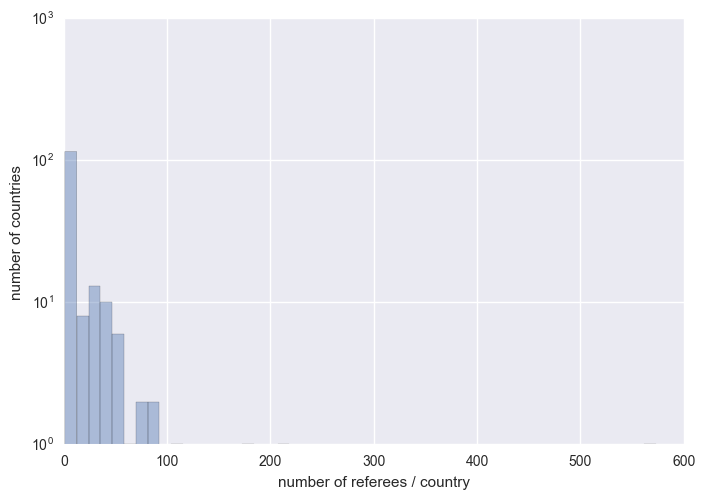

In [26]:
sns.distplot(ref_df,kde=False)

plt.xlabel('number of referees / country')
plt.ylabel('number of countries')
plt.yscale('log')
# plt.xscale('log')

## Stats on racism indices

The IAT/Exp indices are __country spefic__, as proven below:  
(there is only _one IAT/Exp value_, per coutry)

In [27]:
for c in df.refCountry.unique():
    
    if len(df.meanIAT[df.refCountry==c].unique())!=1:
        
        print(c)

Showing IAT/Exp correlation and distribution:

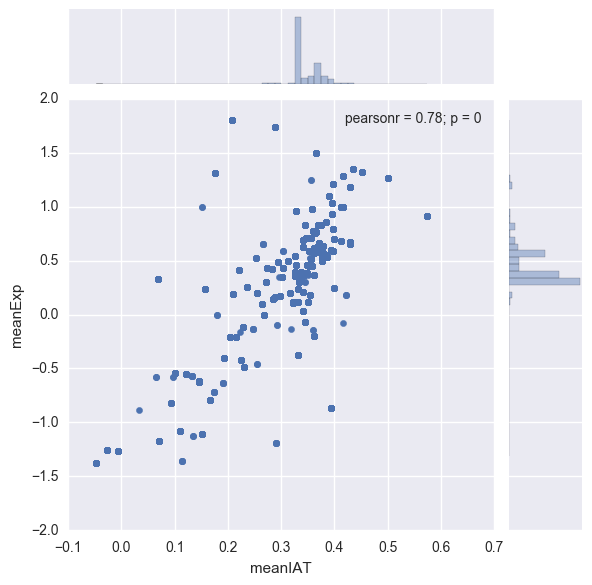

In [28]:
sns.jointplot(df.meanIAT,df.meanExp)

## Distribution of players' age

Convert to datetime format:

In [29]:
df.birthday = pd.to_datetime(df.birthday)

Getting the # player/ bday:

In [30]:
ages_list = []

for p in df.playerShort.unique():
    
    ages_list.append(df[df.playerShort==p].birthday.unique())

In [31]:
# this is just a check:
len(df.playerShort.unique())==len(ages_list) # TRUE! ok

True

In [32]:
# counts the occurrences
dates_count = [[x,ages_list.count(x)] for x in df.birthday.unique()]

# convert to a df - easier to plot!
dates_count = pd.DataFrame(dates_count,columns=['dates','counts'])

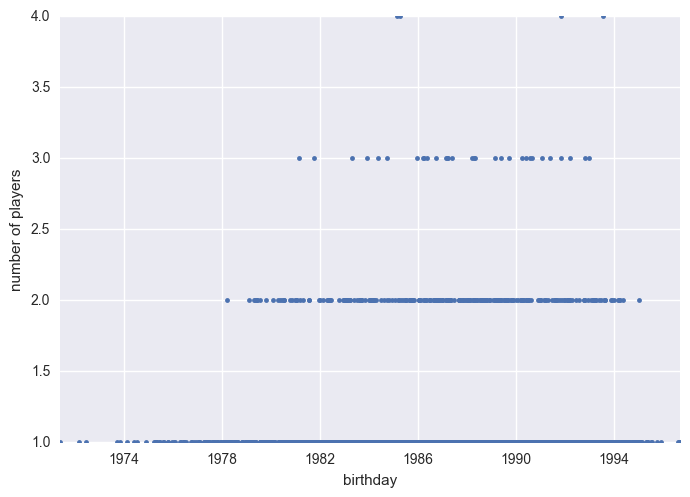

In [33]:
plt.plot(dates_count.dates,dates_count.counts,marker='.',linestyle='')
plt.xlabel('birthday') 
plt.ylabel('number of players')